## 1) Load play-by-play data (nflreadpy)

This notebook uses the **nflreadpy** package to pull **NFL play-by-play (PBP)** data into Python.  
By default, `load_pbp()` fetches the **most recent season**, and we then extend this to a multi-season dataset covering **2022–2025**.

A key reason I chose PBP data is its **granularity**: each game contains a very large number of rows (plays / events), which creates a rich dataset for feature engineering and modelling.

### What I’m doing in the next cells
- Install and import the required libraries
- Load PBP for the latest season, then explicitly load **2022–2025**
- Run quick sanity checks:
  - number of rows
  - which seasons are included
  - the latest `game_date` to confirm freshness
- Inspect available fields by listing columns (this helps guide feature selection later)

> **Note:** You can see just how large the dataset is by running the 3rd cell to see the data features.  
> More detail on the exact target(s), features, and why these seasons are used comes later once the modelling objective is defined.


In [74]:
!pip -q install nflreadpy polars pyarrow

import nflreadpy as nfl

# Current season by default (most_recent_season)
pbp = nfl.load_pbp().to_pandas()

print("Rows:", len(pbp))
print("Seasons:", sorted(pbp["season"].unique()))
print("Latest game_date:", pbp["game_date"].max())

pbp.head()

Rows: 46452
Seasons: [np.int32(2025)]
Latest game_date: 2026-01-04


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,0.0,0.0,-0.352700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,0.0,0.0,-0.190052,NaN,NaN,NaN,NaN,NaN,0.511128,-51.112807
3,85.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,1.0,0.0,1.317340,0.939998,4.750889,3.0,0.666726,0.43911,0.668940,33.105969
4,115.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,0.0,0.0,-1.694360,NaN,NaN,NaN,NaN,NaN,0.492038,50.796208


In [75]:
pbp = nfl.load_pbp([2022, 2023, 2024, 2025]).to_pandas()
print("Latest game_date:", pbp["game_date"].max())

Latest game_date: 2026-01-04


In [76]:
sorted(pbp.columns.tolist())

['aborted_play',
 'air_epa',
 'air_wpa',
 'air_yards',
 'assist_tackle',
 'assist_tackle_1_player_id',
 'assist_tackle_1_player_name',
 'assist_tackle_1_team',
 'assist_tackle_2_player_id',
 'assist_tackle_2_player_name',
 'assist_tackle_2_team',
 'assist_tackle_3_player_id',
 'assist_tackle_3_player_name',
 'assist_tackle_3_team',
 'assist_tackle_4_player_id',
 'assist_tackle_4_player_name',
 'assist_tackle_4_team',
 'away_coach',
 'away_score',
 'away_team',
 'away_timeouts_remaining',
 'away_wp',
 'away_wp_post',
 'blocked_player_id',
 'blocked_player_name',
 'comp_air_epa',
 'comp_air_wpa',
 'comp_yac_epa',
 'comp_yac_wpa',
 'complete_pass',
 'cp',
 'cpoe',
 'def_wp',
 'defensive_extra_point_attempt',
 'defensive_extra_point_conv',
 'defensive_two_point_attempt',
 'defensive_two_point_conv',
 'defteam',
 'defteam_score',
 'defteam_score_post',
 'defteam_timeouts_remaining',
 'desc',
 'div_game',
 'down',
 'drive',
 'drive_end_transition',
 'drive_end_yard_line',
 'drive_ended_with_

In [77]:
week_games = show_week_games(pbp, week=18, season=2025)


  NFL 2025 - WEEK 18

[0] CAR 14 @ TB 16  ← TB Won
    Game ID: 2025_18_CAR_TB

[1] SEA 13 @ SF 3  ← SEA Won
    Game ID: 2025_18_SEA_SF

[2] ARI 20 @ LA 37  ← LA Won
    Game ID: 2025_18_ARI_LA

[3] BAL 24 @ PIT 26  ← PIT Won
    Game ID: 2025_18_BAL_PIT

[4] CLE 20 @ CIN 18  ← CLE Won
    Game ID: 2025_18_CLE_CIN

[5] DAL 17 @ NYG 34  ← NYG Won
    Game ID: 2025_18_DAL_NYG

[6] DET 19 @ CHI 16  ← DET Won
    Game ID: 2025_18_DET_CHI

[7] GB 3 @ MIN 16  ← MIN Won
    Game ID: 2025_18_GB_MIN

[8] IND 30 @ HOU 38  ← HOU Won
    Game ID: 2025_18_IND_HOU

[9] KC 12 @ LV 14  ← LV Won
    Game ID: 2025_18_KC_LV

[10] LAC 3 @ DEN 19  ← DEN Won
    Game ID: 2025_18_LAC_DEN

[11] MIA 10 @ NE 38  ← NE Won
    Game ID: 2025_18_MIA_NE

[12] NO 17 @ ATL 19  ← ATL Won
    Game ID: 2025_18_NO_ATL

[13] NYJ 8 @ BUF 35  ← BUF Won
    Game ID: 2025_18_NYJ_BUF

[14] TEN 7 @ JAX 41  ← JAX Won
    Game ID: 2025_18_TEN_JAX

[15] WAS 24 @ PHI 17  ← WAS Won
    Game ID: 2025_18_WAS_PHI



## 2) Sanity-check the data quality with an interactive play-by-play visualiser

Before building any models, I wanted to **prove to myself that the play-by-play pull was correct and genuinely rich**, not just “box score” level data.

This section builds an **interactive visualiser** that lets you step through a single NFL game **snap-by-snap in chronological order**, showing:

- **Field context**: line of scrimmage, first down marker, ball spot, yards gained
- **Game state**: score, quarter, clock, down & distance
- **Play detail**: full `desc` text (including small but important context like players reporting eligible, substitutions/injury notes, penalties, etc.)
- **Analytics**: metrics like **EPA (Expected Points Added)** alongside basic outcomes like yards gained

The goal here is not “pretty visuals”, it’s **data validation**:
if the notebook can reliably reconstruct a game drive-by-drive, with the same detail fans and analysts care about, then it’s a strong signal the dataset is robust enough for feature engineering and machine learning later.

### Why I set the visual on *Ravens @ Steelers, Week 18*
I set the demo to **Week 18: Baltimore @ Pittsburgh** (2025 season pull) because:
- it’s one of the NFL’s biggest rivalries (**AFC North**)
- both teams were needed to win for a spot in the playoffs and a loss resulted in not making the playoffs and the winner would claim the **AFC North division title**
- as a Steelers fan… I had to 😅
- I also knew most of the snaps as I watched it live recently (easy to check if correct data being pulled)

If you want the full context, here are the highlights:  
https://youtu.be/LbgNNw0SJ3o?si=JwN64Fl-SIehg1QU

> If you’re not into the NFL: think of it like a title-deciding match where a last-minute penalty swings a trophy and skip to minute 16:55...

---

### What the code below does
- Defines an `NFLPlayVisualizer` class that draws:
  - a scaled football field with yard lines and endzones
  - LOS (yellow), first down marker (red dashed), ball position, and a yards-gained arrow
  - a right-hand info panel with wrapped play descriptions + EPA
- Adds simple helper functions to launch the visualiser for:
  - the latest game
  - a chosen team (optionally a specific week)
  - a specific `game_id`

Once this worked end-to-end, it gave me a lot of confidence that the underlying data is **detailed enough to support modelling work** (targets, features, and evaluation come next).

Note that the first play always shows an error because its play 0 after the first click of 'Next' it works. The visuals were tricky so its not quite eye-candy but once I knew the code was pulling data correctly I was happy to move on.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrow, Circle
from matplotlib.gridspec import GridSpec
import numpy as np
import textwrap
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Label, Output

class NFLPlayVisualizer:
    def __init__(self, game_data):
        """
        Initialize visualizer with game data
        game_data: DataFrame filtered to a single game
        """
        self.plays = game_data.reset_index(drop=True)
        self.current_play = 0
        self.total_plays = len(self.plays)

        # Create output widget for the plot
        self.output = Output()

        # Create control buttons
        self.prev_btn = Button(
            description='⬅️ Previous',
            button_style='warning',
            layout=widgets.Layout(width='150px', height='40px')
        )
        self.next_btn = Button(
            description='Next ➡️',
            button_style='success',
            layout=widgets.Layout(width='150px', height='40px')
        )
        self.play_label = Label(
            value=f'Play 1 of {self.total_plays}',
            layout=widgets.Layout(width='200px')
        )

        # Button callbacks
        self.prev_btn.on_click(self.previous_play)
        self.next_btn.on_click(self.next_play)

        # Create UI
        controls = HBox([self.prev_btn, self.play_label, self.next_btn])
        self.ui = VBox([self.output, controls])

    def draw_field(self, ax):
        """Draw the football field"""
        # Field dimensions
        field_length = 120  # 100 yards + 2 x 10 yard endzones
        field_width = 53.3

        # Draw field background (alternating stripes)
        for i in range(0, 120, 10):
            color = '#2d7a2d' if (i // 10) % 2 == 0 else '#35a335'
            ax.add_patch(patches.Rectangle((i, 0), 10, field_width,
                                          facecolor=color, edgecolor='none'))

        # Draw endzones
        ax.add_patch(patches.Rectangle((0, 0), 10, field_width,
                                      facecolor='#d62828', alpha=0.3, edgecolor='white', linewidth=2))
        ax.add_patch(patches.Rectangle((110, 0), 10, field_width,
                                      facecolor='#003f87', alpha=0.3, edgecolor='white', linewidth=2))

        # Draw yard lines
        for yard in range(10, 120, 10):
            ax.plot([yard, yard], [0, field_width], 'white', linewidth=2, alpha=0.6)

        # Draw yard numbers
        for yard in range(20, 110, 10):
            yard_num = min(yard - 10, 110 - yard)
            if yard_num > 0:
                ax.text(yard, field_width/2 - 15, str(yard_num),
                       fontsize=20, color='white', weight='bold',
                       ha='center', va='center',
                       bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))
                ax.text(yard, field_width/2 + 15, str(yard_num),
                       fontsize=20, color='white', weight='bold',
                       ha='center', va='center',
                       bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))

        # Endzone text
        ax.text(5, field_width/2, 'END\nZONE', fontsize=16, color='white',
               weight='bold', ha='center', va='center')
        ax.text(115, field_width/2, 'END\nZONE', fontsize=16, color='white',
               weight='bold', ha='center', va='center')

        ax.set_xlim(0, 120)
        ax.set_ylim(0, field_width)
        ax.axis('off')

    def draw_play_markers(self, ax, play_data):
        """Draw markers for line of scrimmage, first down, ball position, etc."""

        # Get yardline (distance from opponent's goal line)
        yardline_100 = play_data.get('yardline_100', 50)
        if yardline_100 is None or np.isnan(yardline_100):
            yardline_100 = 50
        else:
            yardline_100 = float(yardline_100)

        # Convert to field position (10-110 range)
        field_position = 110 - yardline_100

        field_width = 53.3

        # Line of scrimmage (thick yellow line)
        ax.plot([field_position, field_position], [5, field_width-5],
               color='#ffc107', linewidth=6, label='Line of Scrimmage', zorder=10)

        # First down marker (red line)
        ydstogo = play_data.get('ydstogo', None)
        if ydstogo is not None and not np.isnan(ydstogo):
            ydstogo = float(ydstogo)
            first_down_pos = min(110, field_position + ydstogo)
            ax.plot([first_down_pos, first_down_pos], [5, field_width-5],
                   color='#ff6b6b', linewidth=5, linestyle='--',
                   label='1st Down', zorder=9)

        # Ball marker (football)
        circle = Circle((field_position, field_width/2), 2,
                       color='#8b4513', ec='white', linewidth=2, zorder=20)
        ax.add_patch(circle)

        # Draw play result arrow
        yards_gained = play_data.get('yards_gained', 0)
        if yards_gained is not None and not np.isnan(yards_gained):
            yards_gained = float(yards_gained)
            if yards_gained != 0:
                end_pos = field_position + yards_gained
                end_pos = max(10, min(110, end_pos))

                arrow_color = '#00ff00' if yards_gained > 0 else '#ff0000'
                arrow_y = field_width/2 + 8

                arrow = FancyArrow(field_position, arrow_y,
                                  yards_gained, 0,
                                  width=2, head_width=4, head_length=2,
                                  fc=arrow_color, ec='white', linewidth=1.5,
                                  alpha=0.8, zorder=15)
                ax.add_patch(arrow)

                # Yards gained label
                mid_point = (field_position + end_pos) / 2
                ax.text(mid_point, arrow_y + 5, f'{int(yards_gained):+d} yds',
                       fontsize=12, weight='bold', ha='center',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    def visualize_play(self):
        """Visualize current play"""
        with self.output:
            clear_output(wait=True)

            play = self.plays.iloc[self.current_play]

            # Create figure with better proportions - field is nice and big
            fig = plt.figure(figsize=(24, 11))

            # Use gridspec - field gets 75% width, info gets 25%
            gs = GridSpec(1, 2, figure=fig, width_ratios=[3, 1], wspace=0.2)

            # Field visualization (LEFT - 75% of width, not squished)
            ax_field = fig.add_subplot(gs[0])
            self.draw_field(ax_field)
            self.draw_play_markers(ax_field, play)

            # Add score overlay on field
            away_team = play.get('away_team', 'AWAY')
            home_team = play.get('home_team', 'HOME')
            away_score = play.get('away_score', 0)
            home_score = play.get('home_score', 0)

            score_text = f"{away_team} {away_score} @ {home_team} {home_score}"
            ax_field.text(60, 50, score_text, fontsize=20, weight='bold',
                         ha='center', va='center',
                         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

            # Play info panel (RIGHT - 25% of width)
            ax_info = fig.add_subplot(gs[1])
            ax_info.axis('off')
            ax_info.set_xlim(0, 1)
            ax_info.set_ylim(0, 1)

            # Down and distance
            down = play.get('down', '')
            ydstogo = play.get('ydstogo', '')
            if down and not (isinstance(down, float) and np.isnan(down)):
                down_text = f"{int(down)}{self.get_ordinal(int(down))} & {int(ydstogo) if ydstogo and not np.isnan(ydstogo) else '?'}"
            else:
                down_text = "Special Teams"

            # Quarter and time
            qtr = play.get('qtr', 1)
            time = play.get('game_clock_time', play.get('time', '15:00'))

            # Play description - wrap to 45 characters
            desc = play.get('desc', 'No description available')
            wrapped_desc = '\n'.join(textwrap.wrap(desc, width=45))

            # Play type
            play_type = play.get('play_type', 'no_play')
            play_type_str = play_type.upper().replace('_', ' ') if play_type else 'UNKNOWN'

            # EPA
            epa = play.get('epa', 0)
            epa_text = f"{float(epa):.2f}" if epa is not None and not np.isnan(epa) else "N/A"

            yards = int(play.get('yards_gained', 0)) if not np.isnan(play.get('yards_gained', 0)) else 0

            # Create compact info box
            info_text = f"""PLAY {self.current_play + 1} / {self.total_plays}
{'='*45}

📍 {down_text}

⏱️  Q{int(qtr) if qtr else 1} - {time}

🏈 {play_type_str}

{'='*45}

📝 DESCRIPTION:
{wrapped_desc}

{'='*45}

📊 STATS:
EPA: {epa_text}
Yards: {yards:+d}

{'='*45}"""

            # Position text carefully to avoid overlap
            ax_info.text(0.08, 0.98, info_text, fontsize=10.5, weight='normal',
                        family='monospace', verticalalignment='top',
                        horizontalalignment='left',
                        bbox=dict(boxstyle='round', facecolor='#f8f9fa',
                                 edgecolor='#dee2e6', linewidth=2, pad=18))

            # Tight layout with padding to prevent any overlap
            plt.tight_layout(pad=1.5)
            plt.show()

            # Update play counter
            self.play_label.value = f'Play {self.current_play + 1} of {self.total_plays}'

            # Update button states
            self.prev_btn.disabled = (self.current_play == 0)
            self.next_btn.disabled = (self.current_play == self.total_plays - 1)

    def get_ordinal(self, n):
        """Get ordinal suffix (1st, 2nd, 3rd, 4th)"""
        if 10 <= n % 100 <= 20:
            return 'th'
        else:
            return {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')

    def next_play(self, btn):
        """Go to next play"""
        if self.current_play < self.total_plays - 1:
            self.current_play += 1
            self.visualize_play()

    def previous_play(self, btn):
        """Go to previous play"""
        if self.current_play > 0:
            self.current_play -= 1
            self.visualize_play()

    def show(self):
        """Display the visualizer"""
        display(self.ui)
        self.visualize_play()


# Example usage functions
def visualize_game(pbp_data, game_id=None, team=None, week=None):
    """
    Create interactive visualizer for a game

    Parameters:
    -----------
    pbp_data : DataFrame
        Full play-by-play data
    game_id : str, optional
        Specific game_id to visualize
    team : str, optional
        Team abbreviation (e.g., 'KC', 'SF')
    week : int, optional
        Week number to filter

    Returns:
    --------
    NFLPlayVisualizer object
    """

    if game_id:
        game_data = pbp_data[pbp_data['game_id'] == game_id].copy()
    elif team:
        team_games = pbp_data[
            (pbp_data['home_team'] == team) | (pbp_data['away_team'] == team)
        ].copy()

        if week:
            team_games = team_games[team_games['week'] == week]

        if len(team_games) == 0:
            print(f"No games found for team {team}")
            return None

        latest_game = team_games['game_id'].iloc[-1]
        game_data = pbp_data[pbp_data['game_id'] == latest_game].copy()
    else:
        latest_game = pbp_data['game_id'].iloc[-1]
        game_data = pbp_data[pbp_data['game_id'] == latest_game].copy()

    if len(game_data) == 0:
        print("No play data found!")
        return None

    print(f"Loading game: {game_data.iloc[0]['away_team']} @ {game_data.iloc[0]['home_team']}")
    print(f"Date: {game_data.iloc[0]['game_date']}")
    print(f"Total plays: {len(game_data)}")
    print("\nUse the buttons to navigate!")

    visualizer = NFLPlayVisualizer(game_data)
    return visualizer


def show_latest_game(pbp):
    """Show the most recent game"""
    viz = visualize_game(pbp)
    if viz:
        viz.show()
    return viz

def show_team_game(pbp, team, week=None):
    """Show a specific team's game"""
    viz = visualize_game(pbp, team=team, week=week)
    if viz:
        viz.show()
    return viz

def show_specific_game(pbp, game_id):
    """Show a specific game by game_id"""
    viz = visualize_game(pbp, game_id=game_id)
    if viz:
        viz.show()
    return viz


print("""
USAGE:
------
1. Most recent game:
   viz = show_latest_game(pbp)

2. Specific team's latest game:
   viz = show_team_game(pbp, 'KC')  # Chiefs
   viz = show_team_game(pbp, 'SF', week=10)  # 49ers, week 10

3. Specific game:
   viz = show_specific_game(pbp, '2024_01_KC_BAL')
""")

In [ ]:
viz = show_specific_game(pbp, '2025_18_BAL_PIT')

## 3) EPA deep-dive: is it actually a useful metric?

Coming into this project, I’d barely heard of **EPA**.
Despite being a huge english football and NFL fan.  Most of my previous sports analytics work has been in **english football**, modelling goals via things like **shots on target**, and building models to predict shot volume itself.  

Because I’m new to NFL analytics, I didn’t want to blindly copy common metrics I wanted to **validate from first principles** whether EPA is genuinely informative before using it as a core feature in any machine learning work.

---

### What is EPA (Expected Points Added)?
**Expected Points (EP)** is the average number of points a team can expect to score from a specific game situation, things like:
- down & distance (e.g., 3rd & 7)
- field position (yard line)
- time remaining / quarter
- (and often score context, timeouts, etc., depending on the model)

**Expected Points Added (EPA)** measures how much a play **improves or worsens** a team’s expected points:

$
\text{EPA} = \text{EP after the play} - \text{EP before the play}
$

- **Positive EPA** = the play increased the team’s scoring expectation (a good outcome)
- **Negative EPA** = the play reduced it (a bad outcome)

At a game level, summing EPA over all plays for each team gives a clean, single-number summary of **how efficiently a team moved the game state toward scoring**.

If you’re more familiar with english football analytics: EPA is conceptually similar to **xG added / possession value** ideas, it’s not just “yards”, it’s “value of what happened given the situation”.

---

## Why I’m running this analysis
Before building predictive models, I test a simple question:

> If I compute total team EPA from play-by-play, **does it actually track real outcomes** like points scored, point differential, and who won?

This section aggregates play-by-play into a **game-level dataset** and checks:

1. **Team EPA vs Team Points** (home and away separately)  
2. **EPA Differential vs Score Differential** (does “who had the EPA edge” match “who won the scoreboard”?)  
3. **Total EPA vs Total Points** (is a high-EPA game also a high-scoring game?)  
4. **Winner prediction using only EPA differential** (a deliberately simple baseline)  
5. **Binned EPA diff → win rate curve** (does win probability increase smoothly with EPA advantage?)

---

## Results (2022–2025): EPA is extremely strong here
Across **1,126 games** (2022–2025), EPA behaves exactly like a “good” performance metric should:

- **EPA vs points scored**
  - Home: **r = 0.803**
  - Away: **r = 0.813**

- **EPA differential vs score differential**
  - **r = 0.995 (R² = 0.991)**  
  - In plain terms: **EPA diff explains ~99% of the variation in point differential** in this sample.

- **Winner prediction using sign(EPA diff)**
  - **95.6% accuracy**
  - vs baseline “always pick the home team”: **55.3%**
  - That’s a huge lift for an intentionally simple rule.

- **Win rate by EPA-differential bins**
  - As EPA diff moves from negative → positive, win rate flips from ~0% → ~100%, which is exactly the monotonic behaviour you’d hope to see.

These plots are included as a quick visual “sanity check” that the relationship is stable and not a fluke.

---

## What this means going forward
This gives me confidence that:
- the play-by-play pull is correct,
- the EPA field is internally consistent at game level,
- and EPA contains real signal tied to outcomes.

So from this point onward, **EPA (and EPA-derived features like rolling EPA differential, situational EPA splits, etc.) will be a key metric** in the modelling pipeline, not as the only feature, but as a strong baseline representation of team performance.

> Note: EPA is not “perfect” (garbage time, game state effects, style differences, 'tanking', etc.), but the strength of these relationships makes it a solid foundation to build on.

> Note: The two snippets below is the analysis I have summarised the reuslts up in this markdown


In [80]:
"""
EPA Analysis - Validate EPA as a Predictive Metric
Analyzes relationship between EPA and actual game outcomes
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

sns.set_style('darkgrid')

def analyze_epa_predictive_power(pbp):
    """
    Analyze how well EPA predicts actual game scores and outcomes

    Parameters:
    -----------
    pbp : DataFrame
        Play-by-play data

    Returns:
    --------
    DataFrame with game-level EPA and scores
    """

    print("\n" + "="*80)
    print("  EPA PREDICTIVE POWER ANALYSIS")
    print("="*80 + "\n")

    # Calculate game-level EPA for each team
    game_stats = []

    for game_id in pbp['game_id'].unique():
        game_plays = pbp[pbp['game_id'] == game_id]

        if len(game_plays) == 0:
            continue

        game_info = game_plays.iloc[0]

        # Home team EPA (sum of all EPA when home team has possession)
        home_plays = game_plays[game_plays['posteam'] == game_info['home_team']]
        home_epa = home_plays['epa'].sum()

        # Away team EPA
        away_plays = game_plays[game_plays['posteam'] == game_info['away_team']]
        away_epa = away_plays['epa'].sum()

        # Actual scores
        home_score = game_info['home_score']
        away_score = game_info['away_score']

        game_stats.append({
            'game_id': game_id,
            'season': game_info['season'],
            'week': game_info['week'],
            'home_team': game_info['home_team'],
            'away_team': game_info['away_team'],
            'home_epa': home_epa,
            'away_epa': away_epa,
            'epa_diff': home_epa - away_epa,  # Positive = home has EPA advantage
            'home_score': home_score,
            'away_score': away_score,
            'score_diff': home_score - away_score,  # Positive = home wins
            'total_points': home_score + away_score,
            'total_epa': home_epa + away_epa,
            'home_won': 1 if home_score > away_score else 0
        })

    df = pd.DataFrame(game_stats)

    # Remove any games with missing data
    df = df.dropna()

    print(f"Analyzed {len(df)} games across {df['season'].nunique()} seasons")
    print(f"Date range: {df['season'].min()} - {df['season'].max()}\n")

    return df


def calculate_epa_metrics(df):
    """Calculate correlation and prediction metrics"""

    print("="*80)
    print("  CORRELATION ANALYSIS")
    print("="*80 + "\n")

    # 1. EPA vs Points (team level)
    corr_home, p_home = pearsonr(df['home_epa'], df['home_score'])
    corr_away, p_away = pearsonr(df['away_epa'], df['away_score'])

    print("1. Team EPA vs Team Score:")
    print(f"   Home teams: r = {corr_home:.3f} (p < {p_home:.4f})")
    print(f"   Away teams: r = {corr_away:.3f} (p < {p_away:.4f})")
    print()

    # 2. EPA Differential vs Score Differential
    corr_diff, p_diff = pearsonr(df['epa_diff'], df['score_diff'])
    print("2. EPA Differential vs Score Differential:")
    print(f"   Correlation: r = {corr_diff:.3f} (p < {p_diff:.4f})")
    print(f"   Interpretation: EPA diff explains {corr_diff**2:.1%} of score variance")
    print()

    # 3. Total EPA vs Total Points
    corr_total, p_total = pearsonr(df['total_epa'], df['total_points'])
    print("3. Total EPA vs Total Points (both teams):")
    print(f"   Correlation: r = {corr_total:.3f} (p < {p_total:.4f})")
    print()

    # 4. Winner prediction accuracy
    df['epa_predicted_winner'] = (df['epa_diff'] > 0).astype(int)
    accuracy = (df['epa_predicted_winner'] == df['home_won']).mean()

    print("4. Winner Prediction (using EPA differential):")
    print(f"   Accuracy: {accuracy:.1%}")
    print(f"   Baseline (always pick home): {df['home_won'].mean():.1%}")
    print()

    # 5. EPA bins analysis
    print("5. EPA Differential Bins vs Win Rate:")
    df['epa_bin'] = pd.cut(df['epa_diff'], bins=10, labels=False)
    bin_analysis = df.groupby('epa_bin').agg({
        'home_won': 'mean',
        'game_id': 'count'
    }).rename(columns={'game_id': 'games', 'home_won': 'home_win_rate'})

    print(bin_analysis)
    print()

    return {
        'epa_score_corr': corr_home,
        'epa_diff_corr': corr_diff,
        'total_corr': corr_total,
        'winner_accuracy': accuracy
    }


def visualize_epa_analysis(df):
    """Create comprehensive visualizations of EPA vs outcomes"""

    print("="*80)
    print("  CREATING VISUALIZATIONS")
    print("="*80 + "\n")

    fig = plt.figure(figsize=(20, 12))

    # 1. EPA vs Score (Home teams)
    ax1 = plt.subplot(3, 3, 1)
    ax1.scatter(df['home_epa'], df['home_score'], alpha=0.4, s=20)
    ax1.plot([df['home_epa'].min(), df['home_epa'].max()],
             [df['home_score'].min(), df['home_score'].max()],
             'r--', lw=2, label='Perfect correlation')

    # Add regression line
    z = np.polyfit(df['home_epa'], df['home_score'], 1)
    p = np.poly1d(z)
    ax1.plot(df['home_epa'], p(df['home_epa']), "b-", lw=2, label='Best fit')

    corr, _ = pearsonr(df['home_epa'], df['home_score'])
    ax1.set_xlabel('Home Team EPA', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Home Team Score', fontsize=11, fontweight='bold')
    ax1.set_title(f'EPA vs Actual Score (Home)\nr = {corr:.3f}', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. EPA vs Score (Away teams)
    ax2 = plt.subplot(3, 3, 2)
    ax2.scatter(df['away_epa'], df['away_score'], alpha=0.4, s=20, color='orange')
    z = np.polyfit(df['away_epa'], df['away_score'], 1)
    p = np.poly1d(z)
    ax2.plot(df['away_epa'], p(df['away_epa']), "b-", lw=2, label='Best fit')

    corr, _ = pearsonr(df['away_epa'], df['away_score'])
    ax2.set_xlabel('Away Team EPA', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Away Team Score', fontsize=11, fontweight='bold')
    ax2.set_title(f'EPA vs Actual Score (Away)\nr = {corr:.3f}', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. EPA Differential vs Score Differential
    ax3 = plt.subplot(3, 3, 3)
    ax3.scatter(df['epa_diff'], df['score_diff'], alpha=0.4, s=20, color='green')
    ax3.axhline(0, color='gray', linestyle='--', alpha=0.5)
    ax3.axvline(0, color='gray', linestyle='--', alpha=0.5)

    z = np.polyfit(df['epa_diff'], df['score_diff'], 1)
    p = np.poly1d(z)
    ax3.plot(df['epa_diff'], p(df['epa_diff']), "r-", lw=2, label='Best fit')

    corr, _ = pearsonr(df['epa_diff'], df['score_diff'])
    ax3.set_xlabel('EPA Differential (Home - Away)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Score Differential (Home - Away)', fontsize=11, fontweight='bold')
    ax3.set_title(f'EPA Diff vs Score Diff\nr = {corr:.3f}, R² = {corr**2:.3f}',
                 fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Total EPA vs Total Points
    ax4 = plt.subplot(3, 3, 4)
    ax4.scatter(df['total_epa'], df['total_points'], alpha=0.4, s=20, color='purple')

    z = np.polyfit(df['total_epa'], df['total_points'], 1)
    p = np.poly1d(z)
    ax4.plot(df['total_epa'], p(df['total_epa']), "r-", lw=2, label='Best fit')

    corr, _ = pearsonr(df['total_epa'], df['total_points'])
    ax4.set_xlabel('Total EPA (Both Teams)', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Total Points (Both Teams)', fontsize=11, fontweight='bold')
    ax4.set_title(f'Total EPA vs Total Points\nr = {corr:.3f}', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # 5. EPA Distribution by Winner
    ax5 = plt.subplot(3, 3, 5)
    winners_epa = df[df['home_won'] == 1]['epa_diff']
    losers_epa = df[df['home_won'] == 0]['epa_diff']

    ax5.hist(winners_epa, bins=30, alpha=0.6, label='Home Wins', color='green', edgecolor='black')
    ax5.hist(losers_epa, bins=30, alpha=0.6, label='Home Losses', color='red', edgecolor='black')
    ax5.axvline(0, color='black', linestyle='--', linewidth=2, label='No EPA advantage')
    ax5.set_xlabel('EPA Differential', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax5.set_title('EPA Differential: Winners vs Losers', fontsize=12, fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3, axis='y')

    # 6. Win Probability by EPA Differential
    ax6 = plt.subplot(3, 3, 6)
    bins = pd.cut(df['epa_diff'], bins=20)
    win_rate = df.groupby(bins)['home_won'].agg(['mean', 'count'])
    bin_centers = [(interval.left + interval.right) / 2 for interval in win_rate.index]

    ax6.plot(bin_centers, win_rate['mean'], 'o-', linewidth=2, markersize=8, color='blue')
    ax6.axhline(0.5, color='red', linestyle='--', linewidth=2, label='50% (coin flip)')
    ax6.axvline(0, color='gray', linestyle='--', alpha=0.5)
    ax6.set_xlabel('EPA Differential Bin', fontsize=11, fontweight='bold')
    ax6.set_ylabel('Home Win Rate', fontsize=11, fontweight='bold')
    ax6.set_title('Win Probability vs EPA Differential', fontsize=12, fontweight='bold')
    ax6.legend()
    ax6.grid(True, alpha=0.3)

    # 7. EPA Accuracy by Season
    ax7 = plt.subplot(3, 3, 7)
    season_accuracy = df.groupby('season').apply(
        lambda x: ((x['epa_diff'] > 0).astype(int) == x['home_won']).mean()
    )

    ax7.bar(season_accuracy.index, season_accuracy.values, color='steelblue', edgecolor='black')
    ax7.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Random (50%)')
    ax7.set_xlabel('Season', fontsize=11, fontweight='bold')
    ax7.set_ylabel('Winner Prediction Accuracy', fontsize=11, fontweight='bold')
    ax7.set_title('EPA Prediction Accuracy by Season', fontsize=12, fontweight='bold')
    ax7.legend()
    ax7.grid(True, alpha=0.3, axis='y')

    # 8. Residuals (Prediction Errors)
    ax8 = plt.subplot(3, 3, 8)
    z = np.polyfit(df['epa_diff'], df['score_diff'], 1)
    p = np.poly1d(z)
    predicted = p(df['epa_diff'])
    residuals = df['score_diff'] - predicted

    ax8.scatter(predicted, residuals, alpha=0.4, s=20)
    ax8.axhline(0, color='red', linestyle='--', linewidth=2)
    ax8.set_xlabel('Predicted Score Differential', fontsize=11, fontweight='bold')
    ax8.set_ylabel('Residuals (Actual - Predicted)', fontsize=11, fontweight='bold')
    ax8.set_title('Residual Plot (Prediction Errors)', fontsize=12, fontweight='bold')
    ax8.grid(True, alpha=0.3)

    # 9. Summary Statistics
    ax9 = plt.subplot(3, 3, 9)
    ax9.axis('off')

    corr_epa_score, _ = pearsonr(df['home_epa'], df['home_score'])
    corr_diff, _ = pearsonr(df['epa_diff'], df['score_diff'])
    corr_total, _ = pearsonr(df['total_epa'], df['total_points'])
    accuracy = ((df['epa_diff'] > 0).astype(int) == df['home_won']).mean()

    summary = f"""
    EPA ANALYSIS SUMMARY
    {'='*45}

    DATASET:
    • Games: {len(df):,}
    • Seasons: {df['season'].min()}-{df['season'].max()}
    • Date range: {df['week'].min()}-{df['week'].max()} weeks

    CORRELATIONS:
    • EPA vs Score: r = {corr_epa_score:.3f}
    • EPA Diff vs Score Diff: r = {corr_diff:.3f}
    • Total EPA vs Total Points: r = {corr_total:.3f}

    PREDICTIVE POWER:
    • R² (variance explained): {corr_diff**2:.1%}
    • Winner accuracy: {accuracy:.1%}
    • Baseline (home team): {df['home_won'].mean():.1%}
    • Lift over baseline: {(accuracy - df['home_won'].mean()):.1%}

    CONCLUSION:
    EPA is a {'STRONG' if corr_diff > 0.7 else 'MODERATE' if corr_diff > 0.5 else 'WEAK'}
    predictor of game outcomes.

    {'✓' if accuracy > 0.60 else '✗'} Reliable for winner prediction
    {'✓' if corr_diff**2 > 0.5 else '✗'} Explains majority of score variance
    """

    ax9.text(0.1, 0.5, summary, fontsize=10, verticalalignment='center',
            family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.savefig('epa_analysis.png', dpi=300, bbox_inches='tight')
    print("✓ Saved visualization: epa_analysis.png\n")
    plt.show()


def run_epa_analysis(pbp):
    """
    Complete EPA analysis pipeline

    Parameters:
    -----------
    pbp : DataFrame
        Play-by-play data

    Returns:
    --------
    DataFrame with game-level EPA and scores
    """

    # Step 1: Calculate game-level EPA
    df = analyze_epa_predictive_power(pbp)

    # Step 2: Calculate metrics
    metrics = calculate_epa_metrics(df)

    # Step 3: Visualize
    visualize_epa_analysis(df)

    print("="*80)
    print("  ANALYSIS COMPLETE!")
    print("="*80 + "\n")

    print("VERDICT ON EPA:")
    if metrics['epa_diff_corr'] > 0.7:
        print("✓ EPA is a STRONG predictor - highly trustworthy!")
    elif metrics['epa_diff_corr'] > 0.5:
        print("✓ EPA is a MODERATE predictor - reasonably trustworthy")
    else:
        print("✗ EPA is a WEAK predictor - use with caution")

    print(f"\nKey insight: EPA differential explains {metrics['epa_diff_corr']**2:.1%} of score variance")
    print(f"Winner prediction: {metrics['winner_accuracy']:.1%} accurate\n")

    return df, metrics


# Usage instructions
print("""
USAGE:
------
df, metrics = run_epa_analysis(pbp)

This will:
1. Calculate total EPA for each team in each game
2. Compare EPA to actual scores and outcomes
3. Calculate correlations and prediction accuracy
4. Generate 9 comprehensive visualizations
5. Provide verdict on EPA trustworthiness
""")


USAGE:
------
df, metrics = run_epa_analysis(pbp)

This will:
1. Calculate total EPA for each team in each game
2. Compare EPA to actual scores and outcomes
3. Calculate correlations and prediction accuracy
4. Generate 9 comprehensive visualizations
5. Provide verdict on EPA trustworthiness




  EPA PREDICTIVE POWER ANALYSIS

Analyzed 1126 games across 4 seasons
Date range: 2022 - 2025

  CORRELATION ANALYSIS

1. Team EPA vs Team Score:
   Home teams: r = 0.803 (p < 0.0000)
   Away teams: r = 0.813 (p < 0.0000)

2. EPA Differential vs Score Differential:
   Correlation: r = 0.995 (p < 0.0000)
   Interpretation: EPA diff explains 99.1% of score variance

3. Total EPA vs Total Points (both teams):
   Correlation: r = 0.647 (p < 0.0000)

4. Winner Prediction (using EPA differential):
   Accuracy: 95.6%
   Baseline (always pick home): 55.3%

5. EPA Differential Bins vs Win Rate:
         home_win_rate  games
epa_bin                      
0             0.000000      7
1             0.000000     36
2             0.000000    101
3             0.000000    178
4             0.481375    349
5             1.000000    206
6             1.000000    141
7             1.000000     74
8             1.000000     30
9             1.000000      4

  CREATING VISUALIZATIONS

✓ Saved visualizat

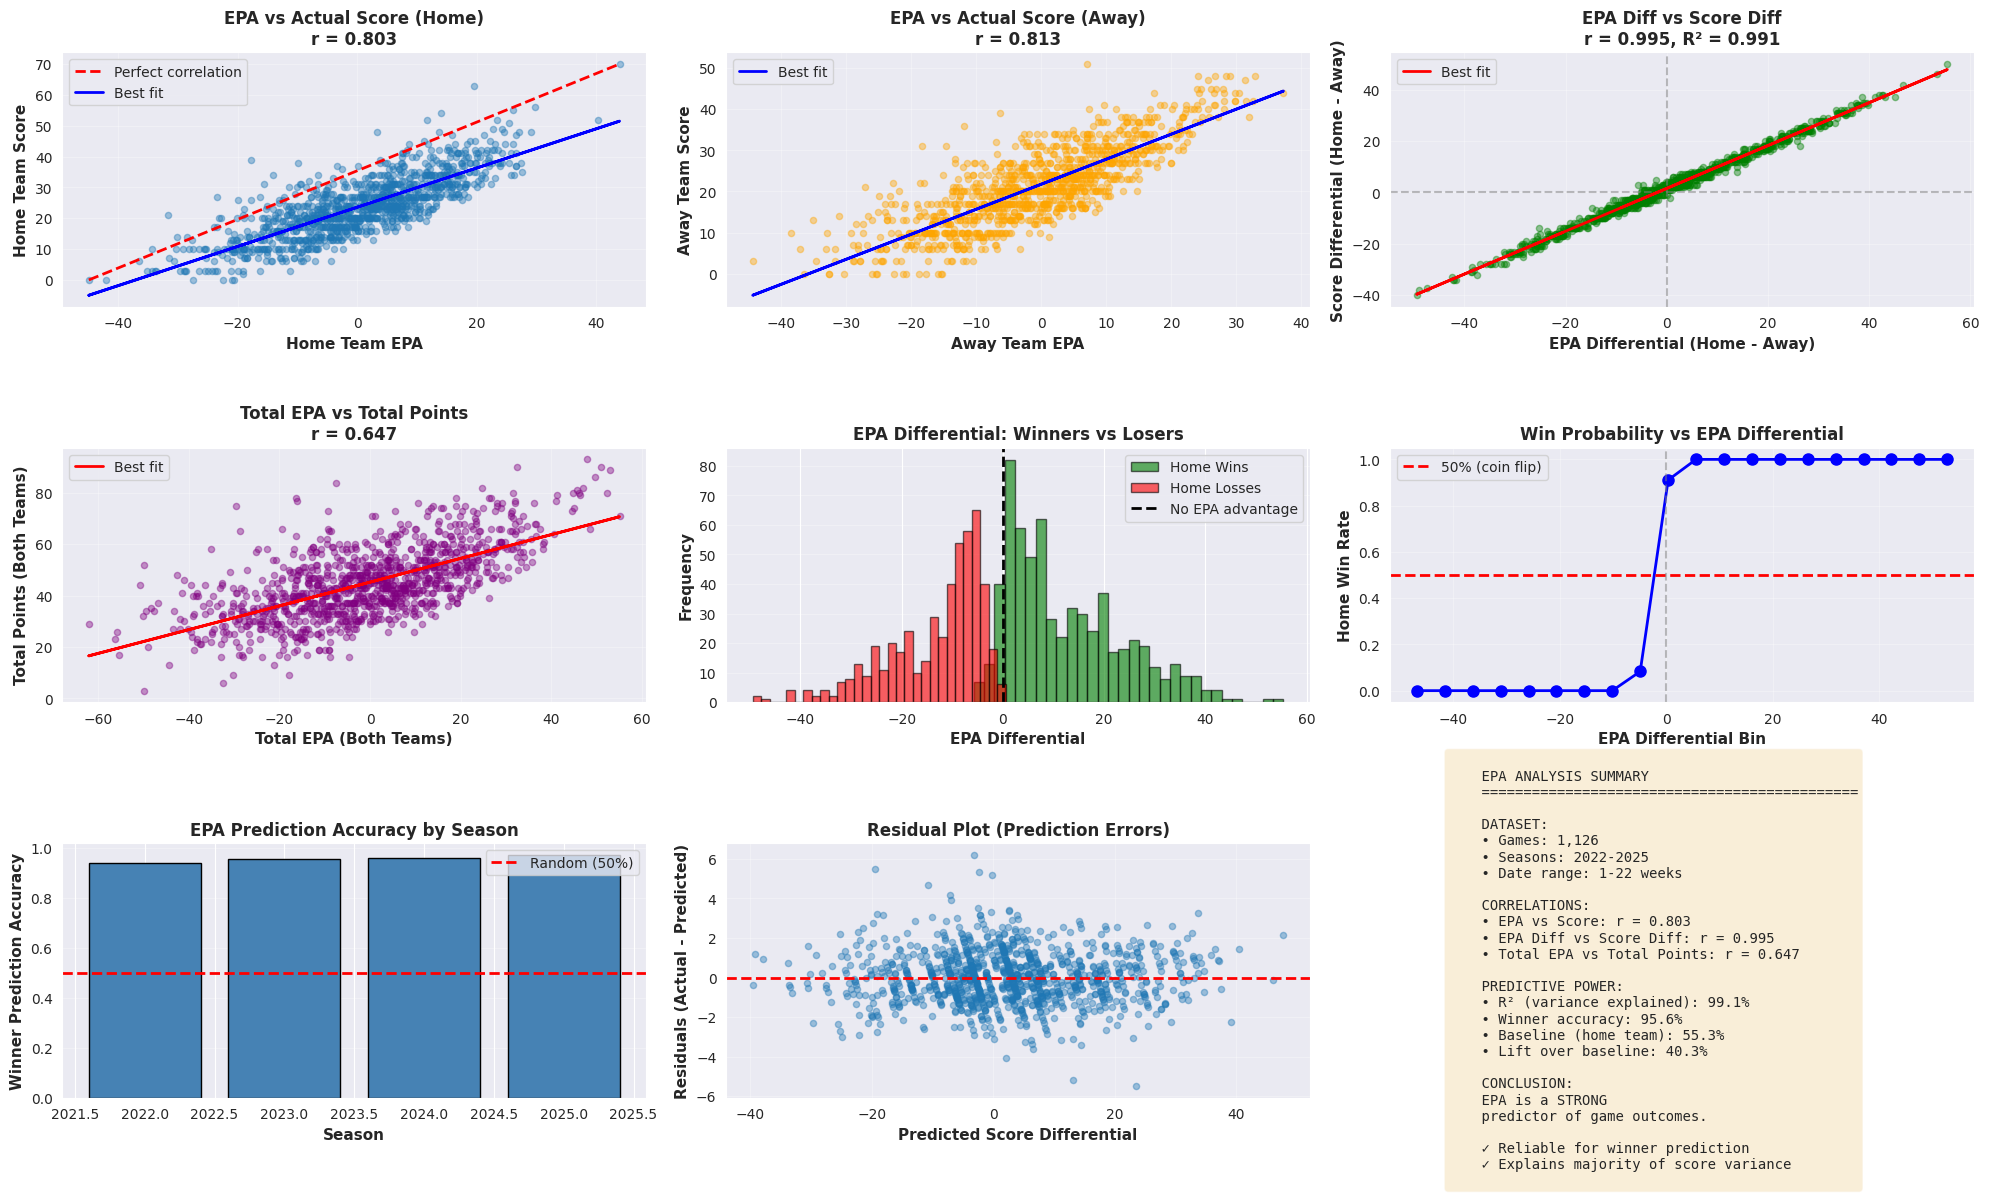

  ANALYSIS COMPLETE!

VERDICT ON EPA:
✓ EPA is a STRONG predictor - highly trustworthy!

Key insight: EPA differential explains 99.1% of score variance
Winner prediction: 95.6% accurate



In [81]:
metrics = run_epa_analysis(pbp)

More work coming soon!